In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import geopandas as gpd
import math
from geopy.geocoders import Nominatim

In [2]:
world = pd.read_csv('Mineral ores round the world.csv')

C:\Users\risha\AppData\Local\Temp\ipykernel_22628\755095867.py:1: DtypeWarning: Columns (13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  world = pd.read_csv('Mineral ores round the world.csv')


In [6]:
world

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite","Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,NaN,Unknown,LATERITIC BAUXITE,L,Producer,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [5]:
Fsplit

In [7]:
world['dev_stat'].value_counts()

Past Producer    128823
Occurrence        67526
Producer          42879
Prospect          35587
Unknown           26809
Plant              3008
Name: dev_stat, dtype: int64

In [9]:
# world[world['dev_stat'] == 'Plant']

In [64]:
world_present = world[world['dev_stat'] == 'Producer']

In [75]:
world_present

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
265,Pack Rat and Johnie Mae,38.64193,-109.04486,NA,United States,Colorado,Mesa,M,"Uranium, Vanadium",NaN,NaN,Unknown,NaN,L,Producer,NaN,NaN,NaN,NaN,Salt,NaN
282,Wattamuse Creek,59.33260,-161.23604,NA,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,Placer,S,Producer,Gold,NaN,NaN,NaN,Gravel,Granite
299,Helen S,56.56974,-133.06798,NA,United States,Alaska,NaN,M,"Gold, Zinc, Lead, Copper",Barium-Barite,NaN,Unknown,NaN,NaN,Producer,"Chalcopyrite, Galena, Gold, Sphalerite",Quartz,Olympic Mining,NaN,Greenstone,Mafic Intrusive Rock
303,Hattie,56.53168,-133.04798,NA,United States,Alaska,NaN,M,Gold,NaN,NaN,Unknown,NaN,NaN,Producer,"Galena, Sphalerite, Pyrite, Chalcopyrite",Quartz,NaN,NaN,Felsic Metamorphic Rock,Greenstone
304,Maid of Mexico,56.56474,-133.03687,NA,United States,Alaska,NaN,M,Gold,"Silver, Copper, Lead, Zinc",NaN,Unknown,NaN,NaN,Producer,"Chalcopyrite, Galena, Gold, Pyrite, Sphalerite",Quartz,Maid of Texas,NaN,Mudstone,Tuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304615,Chacarrilla District,-17.57266,-68.19951,SA,Bolivia,La Paz,NaN,NaN,Copper,NaN,NaN,Unknown,STRATIFORM,M,Producer,NaN,NaN,"Amigo, Borda, Congreso, Esperanza, Eureka, Miz...","NW TRENDING FRACTURES, PREFERRED BEDDING, FLAN...",NaN,NaN
304624,Windarra District,-28.47951,122.23250,OC,Australia,Western Australia,NaN,M,"Nickel, Cobalt, Copper",NaN,NaN,Unknown,"MAGMATIC, ULTRAMAFIC, STRATIFORM, MASSIVE, DIS...",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304625,Kouaoua,-21.39691,165.74852,OC,France,Territory of New Caledonia and Dependencies,NaN,M,"Nickel, Cobalt, Iron",NaN,NaN,Unknown,"LATERITE, RESIDUAL ENRICHMENT",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304626,Congonhas,-20.49747,-43.87395,SA,Brazil,Minas Gerais,NaN,M,Iron,NaN,NaN,Unknown,"BANDED IRON, SEDIMENTARY",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
world_present.isna().sum()

site_name         1
latitude          1
longitude         1
region            0
country           0
state          2847
county         8429
com_type        724
commod1        1014
commod2       38329
commod3       38070
oper_type         0
dep_type      36447
prod_size     25802
dev_stat          0
ore           32253
gangue        38399
names         30944
ore_ctrl      38374
hrock_type    32678
arock_type    38916
dtype: int64

In [29]:
values=pd.Series(world_present['commod1'].dropna())
# values['commod1']=values['commod1'].dropna()

In [34]:
values =values.astype(str).str.split(',')

In [44]:
world_present['commod1'] = values

C:\Users\risha\AppData\Local\Temp\ipykernel_23668\3033060677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_present['commod1'] = values


In [39]:
values.shape

(41830,)

In [65]:
world_present.loc[world_present['country'] == 'United States', 'region'] = 'NA'

In [92]:
world_present['region'].value_counts()

NA        33373
SA         3252
AS         1319
EU         1043
AF          892
OC          547
CR           77
EU, AS        1
Name: region, dtype: int64

In [121]:
world_present[world_present['region'] == 'CR']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
37887,Cuba,21.62171,-79.03613,CR,Cuba,NaN,NaN,M,Gold,Platinum,NaN,Unknown,Placer,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
59622,Carmita Mine,20.36726,-75.90803,CR,Cuba,Santiago De Cuba,NaN,M,Manganese,NaN,NaN,Unknown,NaN,S,Producer,Pyrolusite,NaN,NaN,NaN,Tuff,NaN
59623,Llave,20.32198,-75.90970,CR,Cuba,Santiago De Cuba,NaN,M,Manganese,NaN,NaN,Unknown,NaN,M,Producer,Psilomelane,NaN,NaN,NaN,Tuff,NaN
59875,Grande I Mine,20.05560,-75.96498,CR,Cuba,Santiago De Cuba,NaN,M,Copper,NaN,NaN,Unknown,NaN,Y,Producer,"Chalcopyrite, Pyrite",Quartz,NaN,NaN,Dacite,NaN
59876,Agrupada,20.96834,-76.26249,CR,Cuba,Holguin,NaN,M,Gold,NaN,NaN,Unknown,NaN,Y,Producer,"Gold, Pyrite",Quartz,NaN,NaN,Peridotite,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296447,Ewarton,18.23398,-77.13304,CR,Jamaica,NaN,NaN,M,Aluminum,NaN,NaN,Surface,NaN,NaN,Producer,NaN,NaN,"Schwallenberg Mine, Ewarton Mine",NaN,NaN,NaN
303398,Falconbridge Dominicana Mines,18.93874,-70.40706,CR,Dominican Republic,La Vega,NaN,M,"Iron, Nickel",Cobalt,NaN,Unknown,"LATERITE, RESIDUAL ENRICHMENT",Y,Producer,NaN,NaN,"Bonao Nickel Mines, Bonao Ferronickel Complex,...",NaN,NaN,NaN
303405,Moa Bay District,20.61727,-74.96638,CR,Cuba,Holguin,NaN,M,Nickel,Cobalt,"PGE, Iron, Manganese, Chromium",Unknown,"LATERITE, RESIDUAL ENRICHMENT",L,Producer,NaN,NaN,Pedro Soto Alba Complex: Yamaniguey and Atlan...,NaN,NaN,NaN
303406,Nicaro District,20.58388,-75.54969,CR,Cuba,Holguin,NaN,M,Nickel,Cobalt,"Chromium, Iron",Unknown,"LATERITE, RESIDUAL ENRICHMENT",Y,Producer,NaN,NaN,"Ramona-Loma Mulo Deposit and Ramona Deposit, L...",NaN,NaN,NaN


In [85]:
# world_present = world_present.dropna(subset = 'region')
world_present = world_present.dropna(subset = 'commod1')

In [61]:
# world_present.drop(world_present['region'] == 'EU, AS', axis = 1)

In [122]:
male_names = world_present.loc[world_present['region'] == 'CR', 'commod1'].unique()

In [123]:
male_names

array(['Gold', 'Manganese', 'Copper', 'Zinc, Lead, Barium-Barite',
       'Iron, Silver', 'Zinc, Lead', 'Silver, Gold', 'Tungsten',
       'Brick Clay', 'Halite, Bromine', 'Limestone, General',
       'Limestone, High Calcium', 'Gypsum-Anhydrite', 'Marble, Dimension',
       'Stone', 'Silica', 'Sand and Gravel, Construction', 'Aluminum',
       'Nickel, Cobalt', 'Gold, Silver', 'Chromium',
       'Phosphorus-Phosphates', 'Nickel', 'Iron, Nickel'], dtype=object)

In [124]:
singular_na = []

# loop through each item in the original list
for item in male_names:
    # split the item at each comma
    
    words = item.split(',')
    # loop through each word and add it to the new list
    for word in words:
        singular_na.append(word)

print(singular_na)

['Gold', 'Manganese', 'Copper', 'Zinc', ' Lead', ' Barium-Barite', 'Iron', ' Silver', 'Zinc', ' Lead', 'Silver', ' Gold', 'Tungsten', 'Brick Clay', 'Halite', ' Bromine', 'Limestone', ' General', 'Limestone', ' High Calcium', 'Gypsum-Anhydrite', 'Marble', ' Dimension', 'Stone', 'Silica', 'Sand and Gravel', ' Construction', 'Aluminum', 'Nickel', ' Cobalt', 'Gold', ' Silver', 'Chromium', 'Phosphorus-Phosphates', 'Nickel', 'Iron', ' Nickel']


In [89]:
singular_na.unique()

AttributeError: 'list' object has no attribute 'unique'

In [125]:
unique_cr = list(set(singular_na))

In [113]:
unique_na

[' Construction',
 ' Sulfuric Acid',
 ' Vermiculite',
 'Emery',
 ' Molybdenum',
 ' Platinum',
 'Geothermal',
 'Sand',
 'Titanium',
 'Asbestos',
 'Titanium-Ilmenite',
 'Tantalum',
 'Talc-Soapstone',
 ' Dimension',
 ' Mica',
 'Granite',
 'Kyanite',
 'Helium',
 'Aluminum',
 ' Potassium',
 'Halite',
 'Titanium-Heavy Minerals',
 ' Boron-Borates',
 ' Gypsum-Anhydrite',
 'Cobalt',
 ' Diatomite',
 ' Sulfur',
 ' General',
 'REE',
 ' Aluminum',
 ' Mineral Pigments',
 'Zinc',
 'Natural Gas',
 ' Uranium',
 'Salt',
 'Zirconium',
 'Sand and Gravel',
 ' Tellurium',
 'Slate',
 ' Antimony',
 'Barium-Barite',
 'Wollastonite',
 'Iridium',
 ' Fluorine-Fluorite',
 ' Clay',
 ' Arsenic',
 ' Fire Clay (Refractory)',
 ' REE',
 'Carbon Dioxide',
 'Brick Clay',
 ' Tantalum',
 'Sapphire',
 ' Lithium',
 ' Corundum',
 'Bismuth',
 ' Niobium (Columbium)',
 'Stone',
 'Limestone',
 'Chromium',
 'Lithium',
 'Phosphorus-Phosphates',
 'Vermiculite',
 'Copper Oxide',
 ' Perlite',
 ' Zinc',
 ' Calcium',
 'Lignite',
 'German

In [97]:
unique_sa

[' Construction',
 ' Vermiculite',
 ' Molybdenum',
 ' Platinum',
 'Titanium',
 'Asbestos',
 'Tantalum',
 'Talc-Soapstone',
 ' Dimension',
 'Kyanite',
 'Granite',
 ' Mica',
 ' Boron-Borates',
 'Aluminum',
 ' Potassium',
 'Halite',
 ' Gypsum-Anhydrite',
 'Cobalt',
 ' General',
 ' Travertine',
 'REE',
 ' Aluminum',
 'Zinc',
 ' Uranium',
 'Zirconium',
 'Sand and Gravel',
 ' Antimony',
 'Barium-Barite',
 ' Fluorine-Fluorite',
 ' Clay',
 ' High Alumina Clay',
 ' Arsenic',
 ' REE',
 ' Brick Clay',
 'Brick Clay',
 ' Tantalum',
 ' Lithium',
 'Bismuth',
 ' Niobium (Columbium)',
 'Stone',
 'Limestone',
 'Nitrogen-Nitrates',
 'Chromium',
 'Vermiculite',
 'Phosphorus-Phosphates',
 'Lithium',
 'Copper Oxide',
 ' Calcium',
 ' Zinc',
 ' Iodine',
 'Diatomite',
 ' Cesium',
 'Vanadium',
 'Travertine',
 'Corundum',
 ' Dolomite',
 ' Metal',
 ' Thorium',
 'Fluorine-Fluorite',
 ' Crushed/Broken',
 ' Silica',
 ' Zirconium',
 ' Gold',
 'Boron-Borates',
 'Manganese',
 'Quartz',
 'Sodium',
 'Antimony',
 'Ball Cl

In [102]:
unique_as

[' Molybdenum',
 ' Platinum',
 'Titanium',
 'Asbestos',
 ' Dimension',
 ' Mica',
 ' Boron-Borates',
 'Aluminum',
 ' Potassium',
 'Halite',
 ' Indium',
 ' Gypsum-Anhydrite',
 'Cobalt',
 ' Sulfur',
 ' General',
 'REE',
 'Zinc',
 ' Uranium',
 'Salt',
 'Zirconium',
 ' Tellurium',
 'Wollastonite',
 'Barium-Barite',
 'Iridium',
 ' Pigment',
 ' Fluorine-Fluorite',
 ' Clay',
 ' REE',
 ' Tantalum',
 ' Lithium',
 ' Niobium (Columbium)',
 'Stone',
 'Limestone',
 'Osmium',
 'Chromium',
 'Lithium',
 'Phosphorus-Phosphates',
 ' Zinc',
 ' Cesium',
 'Vanadium',
 'Coal',
 ' Metal',
 ' Thorium',
 'Fluorine-Fluorite',
 'Perlite',
 ' Zirconium',
 ' Gold',
 'Boron-Borates',
 'Manganese',
 ' Osmium',
 'Sodium',
 'Antimony',
 'Magnesite',
 ' Tungsten',
 'Beryllium',
 ' Copper',
 ' Coal',
 ' Bismuth',
 ' Contained or Metal',
 ' Vanadium',
 'Gypsum-Anhydrite',
 'Strontium',
 'Nickel',
 ' Feldspar',
 'Niobium (Columbium)',
 ' Magnesite',
 ' Silver',
 ' Halite',
 ' Iridium',
 'Diamond',
 'Platinum',
 'Sulfur-Pyr

In [107]:
unique_eu

[' Construction',
 ' Molybdenum',
 ' Platinum',
 'Titanium',
 'Asbestos',
 'Talc-Soapstone',
 'Aluminum',
 'Halite',
 'Cobalt',
 ' Sulfur',
 ' General',
 'REE',
 ' Salt',
 ' Aluminum',
 ' Ferromanganese',
 'Zinc',
 'Natural Gas',
 'Sand and Gravel',
 ' Tellurium',
 ' Antimony',
 'Wollastonite',
 'Barium-Barite',
 ' Pigment',
 ' Fluorine-Fluorite',
 ' Graphite',
 ' Tantalum',
 'Bismuth',
 'Chromium',
 'Lithium',
 'Phosphorus-Phosphates',
 ' Calcium',
 ' Zinc',
 ' Rhodium',
 'Ash',
 'Cement Rock',
 'Vanadium',
 ' Metal',
 'Fluorine-Fluorite',
 ' Zirconium',
 ' Gold',
 'Boron-Borates',
 'Manganese',
 ' Osmium',
 'Sodium',
 ' Refiner',
 'Antimony',
 'Magnesite',
 ' Tungsten',
 ' Copper',
 ' Bismuth',
 ' Barium-Barite',
 'Silica',
 'Palladium',
 ' Vanadium',
 ' Ferrochrome',
 ' Talc-Soapstone',
 'Nickel',
 'Niobium (Columbium)',
 'Garnet',
 ' Magnesite',
 ' Silver',
 ' Iridium',
 'Diamond',
 'Platinum',
 'Sulfur-Pyrite',
 'Gold',
 'Mica',
 'Iron',
 ' Lead',
 ' Phosphorus-Phosphates',
 ' Iro

In [115]:
unique_af

[' Vermiculite',
 ' Platinum',
 'Titanium',
 'Asbestos',
 ' Pig Iron',
 'Tantalum',
 'Talc-Soapstone',
 ' Dimension',
 'Granite',
 'Aluminum',
 'Cobalt',
 ' General',
 'Zinc',
 ' Uranium',
 'Salt',
 'Zirconium',
 'Wollastonite',
 'Iridium',
 ' Antimony',
 'Barium-Barite',
 ' Arsenic',
 ' Graphite',
 ' Tantalum',
 ' Lithium',
 ' Carbon Dioxide',
 ' Niobium (Columbium)',
 'Stone',
 'Limestone',
 'Osmium',
 'Chromium',
 'Vermiculite',
 'Phosphorus-Phosphates',
 ' Zinc',
 ' Rhodium',
 ' Cesium',
 'Vanadium',
 ' Metal',
 ' Thorium',
 'Fluorine-Fluorite',
 ' Crushed/Broken',
 ' Zirconium',
 ' Gold',
 'Boron-Borates',
 'Manganese',
 ' Osmium',
 'Sodium',
 'Antimony',
 'Magnesite',
 ' Tungsten',
 'Beryllium',
 ' Copper',
 'Silica',
 ' Stone',
 'Palladium',
 ' Vanadium',
 'Gypsum-Anhydrite',
 'Strontium',
 'Nickel',
 'Niobium (Columbium)',
 ' Silver',
 ' Halite',
 'Feldspar',
 ' Iridium',
 'Diamond',
 'Platinum',
 'Gold',
 'Abrasive',
 ' Marble',
 'Iron',
 ' Lead',
 ' Phosphorus-Phosphates',
 '

In [120]:
unique_oc

[' Molybdenum',
 ' Platinum',
 'Titanium',
 'Asbestos',
 'Tantalum',
 'Talc-Soapstone',
 ' Dimension',
 'Aluminum',
 'Halite',
 'Cobalt',
 ' Sulfur',
 ' General',
 'REE',
 'Zinc',
 ' Uranium',
 'Zirconium',
 'Barium-Barite',
 ' REE',
 'Brick Clay',
 ' Tantalum',
 ' Lithium',
 ' Niobium (Columbium)',
 'Stone',
 'Limestone',
 'Osmium',
 'Chromium',
 'Lithium',
 'Phosphorus-Phosphates',
 ' Zinc',
 'Diatomite',
 'Vanadium',
 ' Thorium',
 ' Metal',
 'Perlite',
 ' Zirconium',
 ' Gold',
 ' Scandium',
 'Manganese',
 ' Osmium',
 'Antimony',
 'Magnesite',
 ' Tungsten',
 ' Copper',
 ' Bismuth',
 'Silica',
 'Palladium',
 'Gypsum-Anhydrite',
 'Dolomite',
 'Nickel',
 'Garnet',
 ' Gemstone',
 ' Silver',
 ' Iridium',
 ' Kaolin',
 'Diamond',
 'Platinum',
 'Sulfur-Pyrite',
 'Gold',
 ' Kyanite',
 'Iron',
 ' Lead',
 ' Phosphorus-Phosphates',
 ' Iron',
 ' Cobalt',
 'Tin',
 'Copper',
 'Marble',
 'Clay',
 'Tungsten',
 'Graphite',
 ' Nickel',
 'Kaolin',
 'PGE',
 ' Tin',
 'Molybdenum',
 'Lead',
 ' Sulfur-Pyrit

In [126]:
unique_cr

[' Construction',
 'Chromium',
 'Phosphorus-Phosphates',
 'Gypsum-Anhydrite',
 'Nickel',
 ' Nickel',
 ' Dimension',
 'Aluminum',
 'Halite',
 ' Silver',
 ' General',
 'Zinc',
 'Gold',
 'Silver',
 ' Bromine',
 ' High Calcium',
 ' Gold',
 'Sand and Gravel',
 'Iron',
 ' Lead',
 'Manganese',
 ' Cobalt',
 'Copper',
 'Brick Clay',
 'Marble',
 ' Barium-Barite',
 'Stone',
 'Silica',
 'Limestone',
 'Tungsten']

In [127]:
def draw_wordcloud(wordcloud, size):
    plt.figure(figsize = size)
    plt.imshow(wordcloud) 
    plt.axis("off")

In [128]:
from wordcloud import WordCloud, STOPWORDS
import random

In [135]:
world_present['region'].value_counts()

NA        33373
SA         3252
AS         1319
EU         1043
AF          892
OC          547
CR           77
EU, AS        1
Name: region, dtype: int64

In [242]:
new_ehhe = ' '.join(ehhe)

In [243]:
wordcloud = WordCloud(width = 1000, 
                      height = 600, 
                      random_state = 42, 
                      collocations = False, 
                      background_color = 'lightyellow', 
                      colormap = 'tab10', 
                      stopwords = STOPWORDS).generate(new_ehhe)

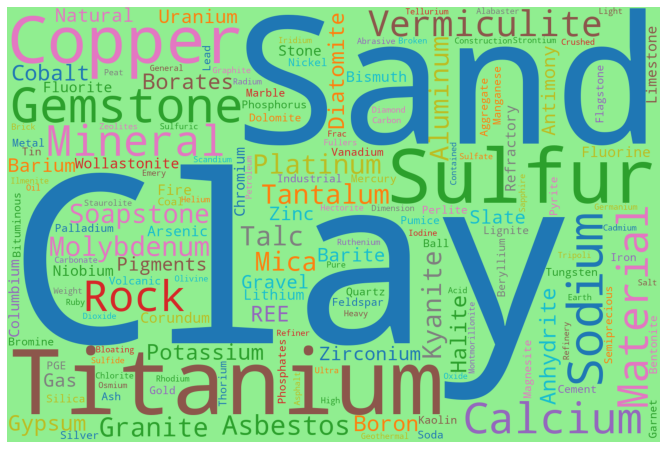

In [134]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently mined in NA

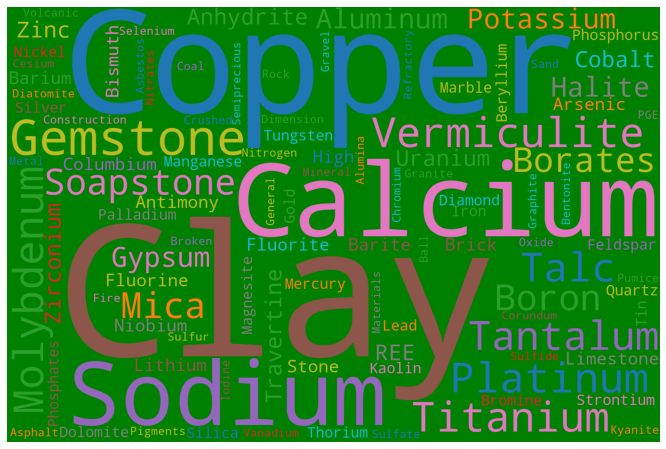

In [141]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently mined in SA

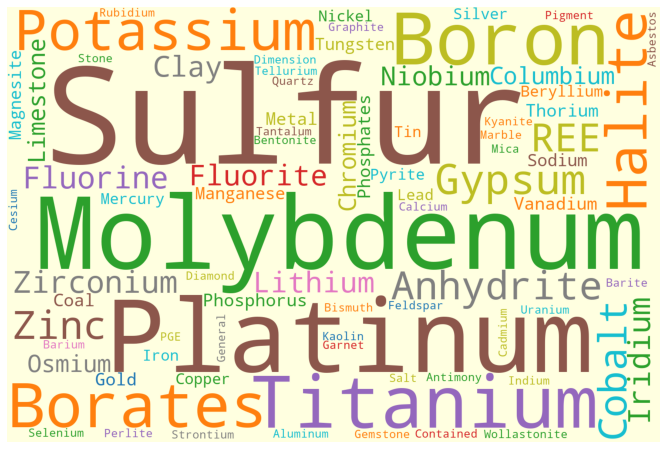

In [146]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently mined in Asia


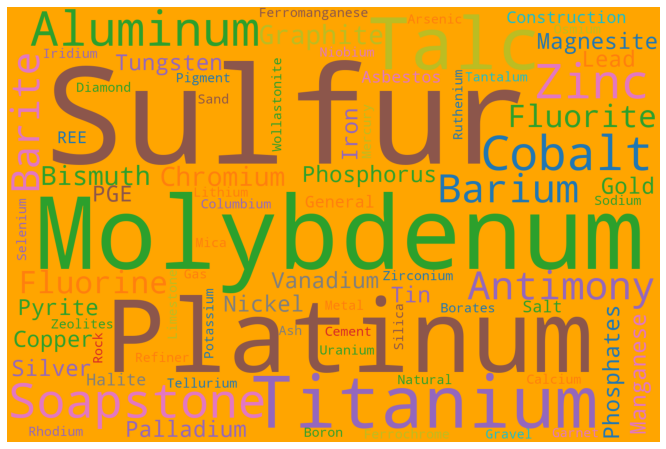

In [152]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently mined in Europe

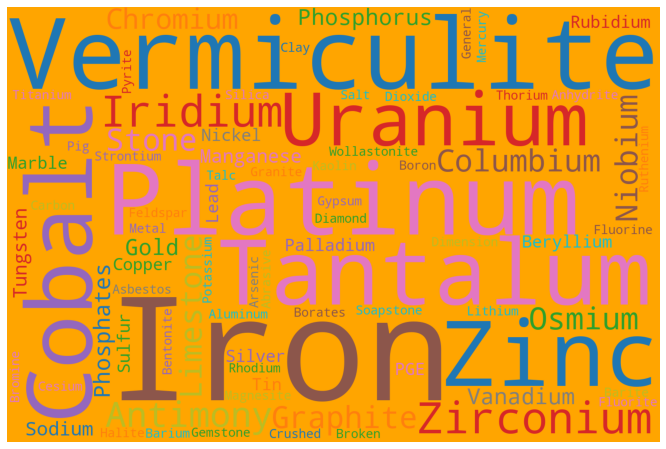

In [155]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently in Africa

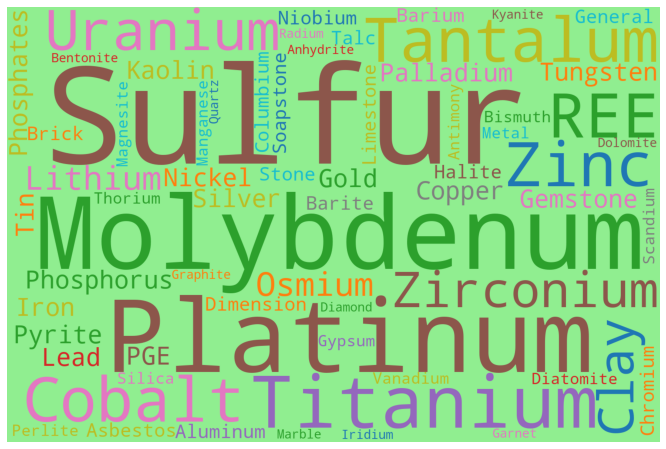

In [160]:
draw_wordcloud(wordcloud, (12,8))

# Minerals currently mined in Australia

In [162]:
world_India = world[world['country'] == 'India']

In [172]:
world_India

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
3891,Adilabad,22.88286,79.61656,AS,India,NaN,NaN,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,"Shale,Limestone,Chert",NaN
3894,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,NaN,Unknown,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,Jagantola,NaN,"Quartzite,Schist",NaN
3896,Bharweli,21.81614,80.18367,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,NaN,Unknown,NaN,L,Past Producer,Hollandite,Quartz,Balaghat,NaN,"Quartzite,Phyllite",NaN
3900,Cavarem,15.12510,74.14215,AS,India,NaN,NaN,M,Manganese,NaN,NaN,Unknown,NaN,S,Producer,"Braunite, Jacobsite, Manganite, Pyrolusite","Goethite, Quartz, Sericite",NaN,Crest Of Anticlines,Phyllite,"Diorite,Gabbro,Mafic Metamorphic Rock,Gneiss"
3905,Garbham,16.60541,79.58501,AS,India,Andhra Pradesh,NaN,M,Manganese,NaN,NaN,Unknown,NaN,N,Occurrence,"Bixbyite, Braunite, Pyrolusite","Garnet, Goethite, Quartz",NaN,NaN,Quartzite,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103976,Belkapahar,25.76583,73.43386,AS,India,Rajasthan,NaN,N,Wollastonite,Calcium,NaN,Unknown,NaN,M,Producer,"Calcite, Wollastonite","Diopside, Garnet, Quartz","Belkapahan, Khila",NaN,"Pyroxenite,Schist,Gneiss",Pyroxenite
104009,Kaliapani Mine,21.04953,85.75019,AS,India,Orissa,NaN,M,Chromium,NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,Sukinda Valley Complex,NaN,Dunite,NaN
104502,Amba Dongar Fluorspar Deposit,21.99948,74.08383,AS,India,Gujarat,NaN,N,Fluorine-Fluorite,NaN,NaN,Unknown,NaN,Y,Producer,Fluorite,"Barite, Dickite, Quartz",NaN,Joints And Cavities In Carbonatites. Boundary ...,"Intrusive Carbonatite,Sandstone",Intrusive Carbonatite
104659,Kiriburu Mine,22.06611,85.26688,AS,India,Orissa,NaN,M,Iron,NaN,NaN,Unknown,NaN,Y,Producer,Hematite,NaN,NaN,NaN,Quartzite,NaN


In [178]:
male_names = world_India['hrock_type']

In [171]:
world_India = world_India.dropna(subset = 'hrock_type')

In [179]:
singular_na = []

# loop through each item in the original list
for item in male_names:
    # split the item at each comma
    
    words = item.split(',')
    # loop through each word and add it to the new list
    for word in words:
        singular_na.append(word)

print(singular_na)

['Shale', 'Limestone', 'Chert', 'Quartzite', 'Schist', 'Quartzite', 'Phyllite', 'Phyllite', 'Quartzite', 'Quartzite', 'Schist', 'Quartzite', 'Schist', 'Quartzite', 'Phyllite', 'Schist', 'Phyllite', 'Quartzite', 'Schist', 'Phyllite', 'Phyllite', 'Phyllite', 'Metasedimentary Rock', 'Shale', 'Chert', 'Phyllite', 'Phyllite', 'Phyllite', 'Granite', 'Basalt', 'Gneiss', 'Hornfels', 'Hornfels', 'Schist', 'Basalt', 'Hornfels', 'Hornblendite', 'Mica Schist', 'Granulite', 'Dunite', 'Dunite', 'Schist', 'Volcanic Breccia (Agglomerate)', 'Gabbro', 'Basalt', 'Basalt', 'Basalt', 'Basalt', 'Granite', 'Basalt', 'Basalt', 'Basalt', 'Quartzite', 'Limestone', 'Phyllite', 'Dolomite', 'Chert', 'Schist', 'Granite', 'Dolomite', 'Schist', 'Metasedimentary Rock', 'Phyllite', 'Mica Schist', 'Limestone', 'Dolomite', 'Quartzite', 'Quartzite', 'Quartzite', 'Quartzite', 'Quartzite', 'Quartzite', 'Phyllite', 'Phyllite', 'Quartzite', 'Quartzite', 'Quartzite', 'Shale', 'Mafic Intrusive Rock', 'Metasedimentary Rock', 'Gr

In [181]:
from collections import Counter

In [182]:
counted_elements = Counter(singular_na)

In [183]:
counted_elements

Counter({'Shale': 3,
         'Limestone': 3,
         'Chert': 3,
         'Quartzite': 21,
         'Schist': 11,
         'Phyllite': 17,
         'Metasedimentary Rock': 3,
         'Granite': 4,
         'Basalt': 13,
         'Gneiss': 2,
         'Hornfels': 4,
         'Hornblendite': 1,
         'Mica Schist': 2,
         'Granulite': 1,
         'Dunite': 3,
         'Volcanic Breccia (Agglomerate)': 1,
         'Gabbro': 1,
         'Dolomite': 3,
         'Mafic Intrusive Rock': 1,
         'Sand and Gravel': 3,
         'Pyroxenite': 1,
         'Intrusive Carbonatite': 1,
         'Sandstone': 1})

<AxesSubplot:>

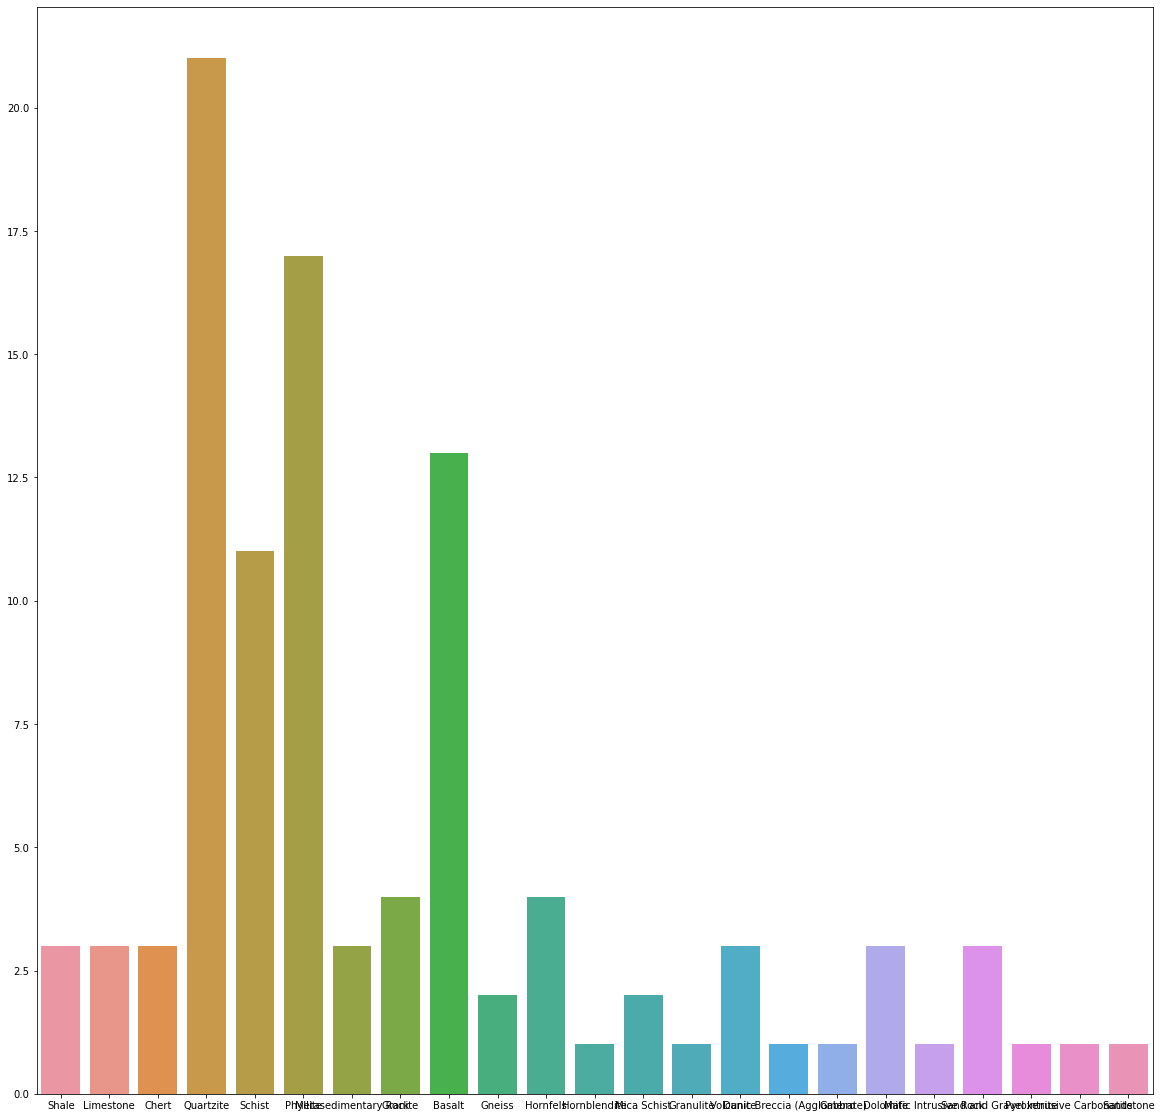

In [188]:
plt.figure(figsize=(20, 20))
keys = list(counted_elements.keys())
# get values in the same order as keys, and parse percentage values
vals = [counted_elements[k] for k in keys]
sns.barplot(x=keys, y=vals)

In [ ]:
# Quartzite
# Phyllite
# Basalt
# Schist
# Hornfelt

In [206]:
world_US = world[world['country'] == 'United States']

In [208]:
world_US = world_US.dropna(subset = 'commod1')

In [210]:
world_US[world_US['commod1'] == 'Gold, Copper']

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,names,ore_ctrl,hrock_type,arock_type
238,Polson and Ickis Group,54.94973,-132.02398,NaN,United States,Alaska,NaN,M,"Gold, Copper",NaN,REE,Unknown,NaN,N,Occurrence,"Bornite, Chalcopyrite, Chrysocolla, Xenotime","Barite, Calcite, Hematite, Pyrite, Quartz","Prospect: Veta, Wano, Polson and Ickis, Claims...",NaN,Monzonite,Diabase
370,Dickey Copper Co.,60.76959,-146.41253,NaN,United States,Alaska,NaN,M,"Gold, Copper","Lead, Silver, Cobalt, Zinc",NaN,Unknown,NaN,NaN,Past Producer,"Chalcopyrite, Pyrite, Pyrrhotite, Sphalerite","Calcite, Quartz",Mason & Gleason Co.,NaN,Siltstone,NaN
434,Mt. Estelle,61.84949,-152.89277,NaN,United States,Alaska,NaN,M,"Gold, Copper","Arsenic, Molybdenum, Antimony, Lead, Zinc",NaN,Unknown,NaN,NaN,Prospect,"Arsenopyrite, Chalcopyrite, Galena, Malachite,...","Chlorite, Limonite, Quartz, Sericite",NaN,NaN,NaN,NaN
747,Unnamed (south of upper Long Creek),63.17958,-149.69282,NaN,United States,Alaska,NaN,M,"Gold, Copper","Chromium, Platinum, Nickel",NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Chromite, Pyrite",NaN,NaN,NaN,NaN,NaN
783,Chathenda Creek,62.08081,-141.91444,NaN,United States,Alaska,NaN,M,"Gold, Copper",NaN,NaN,Unknown,NaN,NaN,Prospect,"Chalcopyrite, Marcasite, Pyrite",Quartz,Johnson Creek,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300745,Unnamed (west-northwest of Kettle Cape),53.28907,-168.25237,NaN,United States,Alaska,NaN,NaN,"Gold, Copper","Zinc, Molybdenum, Silver",NaN,Unknown,NaN,NaN,Occurrence,"Chalcopyrite, Gold, Pyrite",Quartz,NaN,NaN,NaN,NaN
300967,Bear Mountain,55.35574,-131.63877,NaN,United States,Alaska,NaN,M,"Gold, Copper",NaN,NaN,Unknown,NaN,NaN,Prospect,NaN,NaN,Malaspina,NaN,NaN,NaN
301577,Coon Gold Exploration,46.60611,-87.64835,NaN,United States,Michigan,Marquette,M,"Gold, Copper",NaN,NaN,Underground,NaN,U,Occurrence,"Gold, Galena, Pyrite, Sphalerite",NaN,NaN,NaN,NaN,NaN
301726,Phoenix Project,40.54730,-117.12470,NaN,United States,Nevada,Lander,M,"Gold, Copper",Silver,"Palladium, Molybdenum, Lead, Zinc, Arsenic",Surface-Underground,"contact metasomatic, wallrock porphyry, partia...",M,Producer,"Gold, Silver, Pyrite, Chalcopyrite, Pyrrhotite...","Garnet, Quartz, Diopside, Tremolite, Actinolit...","Battle Mountain Mine, Battle Mountain Project",Ore is controlled by both favorable horizons i...,"Conglomerate,Sandstone,Shale,Chert,Argillite","Granodiorite,Quartz Diorite"


In [222]:
world_US = world_US.loc[world_US['commod1'].str.contains("Gold, Copper", case=False)]

In [223]:
com2 = world_US['commod2']
com3 = world_US['commod3']

In [226]:
com2 = com2.dropna()
com3 = com3.dropna()

In [227]:
com2

370                      Lead, Silver, Cobalt, Zinc
434       Arsenic, Molybdenum, Antimony, Lead, Zinc
692                                Molybdenum, Zinc
707                   Lead, Arsenic, Antimony, Zinc
747                      Chromium, Platinum, Nickel
                            ...                    
303806                                   Lead, Zinc
303897                    Nickel, Tungsten, Uranium
304412                                   Lead, Iron
304447                                         Zinc
304451                        Manganese, Iron, Lead
Name: commod2, Length: 193, dtype: object

In [228]:
com3

238                                          REE
1356                                  Lead, Zinc
8867                                     Arsenic
9023                             Cobalt, Bismuth
10556                                       Zinc
                           ...                  
303076                             Bismuth, Lead
303125    Titanium, Bismuth, Antimony, Tellurium
303806                                  Antimony
304412                         Arsenic, Antimony
304447                                   Bismuth
Name: commod3, Length: 136, dtype: object

In [ ]:
male_names = com2

In [233]:
singular_na = []

# loop through each item in the original list
for item in com3:
    # split the item at each comma
    
    words = item.split(',')
    # loop through each word and add it to the new list
    for word in words:
        singular_na.append(word)

print(singular_na)

['REE', 'Lead', ' Zinc', 'Arsenic', 'Cobalt', ' Bismuth', 'Zinc', 'Molybdenum', 'Zinc', 'Iron', ' Zinc', ' Lead', 'Antimony', 'Iron', 'Manganese', 'Nickel', ' Lead', 'Tellurium', 'Zinc', 'Zinc', 'Lead', ' Tellurium', ' Selenium', 'Manganese', ' Strontium', ' Tellurium', ' Uranium', ' Antimony', ' Bismuth', ' Phosphorus-Phosphates', 'Zinc', ' Antimony', ' Tellurium', 'Tungsten', 'Arsenic', ' Antimony', 'Zinc', 'Iron', 'Molybdenum', ' Tungsten', 'Tungsten', ' Barium-Barite', ' Lead', 'Lead', 'Vanadium', ' Zinc', 'Iron', 'Molybdenum', 'Iron', ' Molybdenum', ' Vanadium', ' Uranium', 'Lead', 'Lead', ' Molybdenum', 'Molybdenum', ' Cobalt', 'Sulfur', 'Zinc', ' Antimony', 'Arsenic', 'Silver', 'Arsenic', 'Arsenic', ' Antimony', 'Arsenic', 'Lead', ' Antimony', 'Zinc', ' Lead', 'Cobalt', ' Nickel', 'Molybdenum', 'Arsenic', ' Nickel', ' Cobalt', ' Mercury', 'Mercury', 'Mercury', 'Barium-Barite', ' Zinc', ' Antimony', 'Barium-Barite', 'Manganese', 'Zinc', ' Silver', 'Silver', ' Lead', ' Zinc', ' Ba

In [232]:
com2 = singular_na

In [234]:
com3 = singular_na

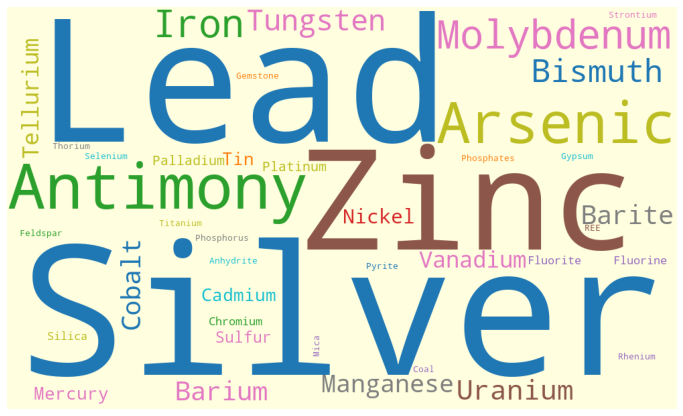

In [244]:
draw_wordcloud(wordcloud, (12,8))

# By product minerals where Gold and Copper are abundant in the US

In [ ]:
canv